In [76]:
import re
import torch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
import random

In [77]:
def read_bird_names(fname):
    names = []
    with open(fname, 'r') as fp:
        next(fp)
        for line in fp:
            if ",Aves," in line:
                toks = line.split(',')
                try:
                    name = toks[17].lower()
                    #remove any non a-z, apostrophe or space
                    name = re.sub(r'[^a-z\s]', '', name)
                    name = re.sub(r'\s+', '_', name)
                    name = name.strip()
                    if len(name) > 3:
                        names.append(name)
                except:
                    pass
    return sorted(list(set(names)))
words = read_bird_names("/Users/satyajitgupte/code/birds/taxa_english.csv")

In [78]:
random.shuffle(words)

In [79]:
chars = sorted(list(set(''.join(words))))
# +1 for .
sz = len(chars) + 1
itos = {i+1:s for i,s in enumerate(chars)}
itos[0] = '.'
stoi = {s:i for i,s in itos.items()}

In [80]:
itos

{1: '_',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'x',
 26: 'y',
 27: 'z',
 0: '.'}

### implement the MLP model from https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf


In [81]:
def make_dataset(words, block_size=2):
    xs = []
    ys = []
    for word in words:
        #print(word)
        context = [0]*block_size
        for char in word + '.':
            ix = stoi[char]
            ys.append(ix)
            xs.append(context)
            #print(f"{''.join(itos[c] for c in context)}->{itos[ix]}")
            context = context[1:] + [ix]
    return torch.tensor(xs), torch.tensor(ys)
        

In [110]:
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,Ytr = make_dataset(words[:n1], block_size=3)
Xdev,Ydev = make_dataset(words[n1:n2], block_size=3)
Xte,Yte = make_dataset(words[n2:], block_size=3)


In [111]:
Xtr.shape, Xdev.shape, Xte.shape

(torch.Size([451916, 3]), torch.Size([57016, 3]), torch.Size([56228, 3]))

In [140]:
emb_size = 20
block_size = 3
hidden = 100

In [141]:
import torch.nn.functional as F
C = torch.randn(sz, emb_size)
W1 = torch.randn(emb_size*block_size, hidden)
b1 = torch.randn(hidden)
W2 = torch.randn(hidden, sz)
b2 = torch.randn(sz)
parameters = [C, W1, b1, W2, b2]
for param in parameters:
    param.requires_grad = True


In [142]:
lossi = []
stepi = []


In [161]:
for i in range(100000):
    
    # minibatch
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward
    emb = C[Xtr[ix]].view(-1, emb_size*block_size)
    h = torch.tanh(emb @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for param in parameters:
        param.grad = None
    loss.backward()

    # update
    for param in parameters:
        lr = 0.005
        param.data += -lr*param.grad
    lossi.append(loss.item())
    stepi.append(i)

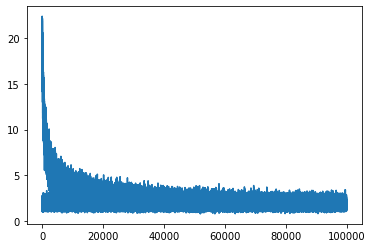

In [162]:
plt.plot(stepi, lossi)

In [164]:
loss.item()

1.6726877689361572

In [165]:
# loss on entire training set
emb = C[Xtr].view(-1, emb_size*block_size)
h = torch.tanh(emb @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

1.7420872449874878

In [166]:
# loss on entire dev set
emb = C[Xdev].view(-1, emb_size*block_size)
h = torch.tanh(emb @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

1.7442268133163452

In [167]:
g = torch.Generator().manual_seed(7)

In [169]:

for _ in range(15):
    ix = [0]*block_size
    out_ixs = []
    while True:
        emb = C[torch.tensor(ix)].view(-1, emb_size*block_size)
        h = torch.tanh(emb @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix_out = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        ix.append(ix_out)
        ix = ix[1:]
        if ix_out == 0:
            break
        out_ixs.append(ix_out)
    print(''.join(itos[ix] for ix in out_ixs))

cher
typiculot
cards
gor
panbackebia_islbrow
southerontedreds
mypicta_swarbler
siicted_tnomuscnnamounteineafted_fadahur
soads
eurins_tlunked_lark
easternsthianotn_greythroateba_raif_plain_rani_labirds_warblengueater
chowbillandofagandwalliestern_froglasian_tit
maninged_wren_sparrotstaner
marted_mingea_seainn_oyte_pestforkbiller
plawescr
